In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import seaborn as sns
from nbformat import read
import scipy.sparse as sp
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso
from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import make_scorer, recall_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [3]:
X_y_train = np.load('X_y_train.npy')
X_y_train.shape

(1000000, 10)

In [4]:
X_y_test = np.load('X_y_test.npy')
X_y_test.shape

(200000, 10)

In [5]:
X_train = X_y_train[:, :-1]  # Features
X_test = X_y_test[:, :-1]  # Features

y_train = X_y_train[:, -1]  # Labels
y_test = X_y_test[:, -1]  # Labels

### Metric

our favorable metric is recall, beacuse our label consist mostly of 0 and it is important for us that the model can find these nonzero labels and don't predict 0 everywhere

## Linear Regressin Model

In [16]:
start_time = time.time()
linear_regressor = LinearRegression()

linear_regressor.fit(X_train, y_train)
end_time = time.time()
training_time = end_time - start_time
print("Training Time:", training_time, "seconds")
print()

start_time = time.time()
y_pred_lr = linear_regressor.predict(X_test)
end_time = time.time()
prediction_time = end_time - start_time
print("Prediction Time:", prediction_time, "seconds")
print()

mse = mean_squared_error(y_test, y_pred_lr)

print("Mean Squared Error:", mse)

Training Time: 0.14602875709533691 seconds

Prediction Time: 0.002513885498046875 seconds

Mean Squared Error: 0.007436262439837846


### Confusion matrix

In [11]:
# Transform probabilities into binary predictions using a threshold (0.5)
linear_preds_binary = (y_pred_lr > 0.5).astype(int)

conf_matrix_linear = confusion_matrix(y_test, linear_preds_binary)

print("Confusion Matrix for Linear Regression:")
print()
print(conf_matrix_linear)
print()

accuracy_lr = accuracy_score(y_test, linear_preds_binary)

#precision_lr = precision_score(y_test, linear_preds_binary)

recall_lr = recall_score(y_test, linear_preds_binary)

f1_lr = f1_score(y_test, linear_preds_binary)

print(f'recall_lr = {recall_lr}')
print()
print('recall is 0,hence this model is not doing good')

Confusion Matrix for Linear Regression:

[[198477      0]
 [  1523      0]]

recall_lr = 0.0

recall is 0,hence this model is not doing good


### Linear regression learning curve

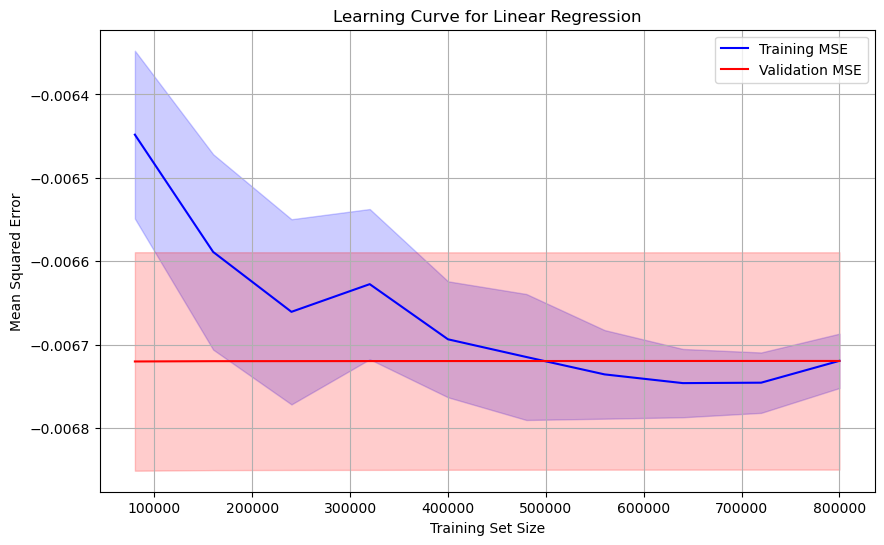

In [20]:
train_sizes, train_scores, valid_scores = learning_curve(
    linear_regressor, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5, scoring='neg_mean_squared_error'
)

# Calculate mean and standard deviation of training and validation scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training MSE', color='blue')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color='blue')
plt.plot(train_sizes, valid_mean, label='Validation MSE', color='red')
plt.fill_between(train_sizes, valid_mean - valid_std, valid_mean + valid_std, alpha=0.2, color='red')
plt.title('Learning Curve for Linear Regression')
plt.xlabel('Training Set Size')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)
plt.show()

## Decision Tree Model

In [43]:
start_time = time.time()
dt = DecisionTreeClassifier(random_state=42)

dt.fit(X_train, y_train)
end_time = time.time()
training_time = end_time - start_time
print("Training Time:", training_time, "seconds")
print()

start_time = time.time()
# Predict on the test set
y_pred_dt = dt.predict(X_test)
end_time = time.time()
prediction_time = end_time - start_time
print("Prediction Time:", prediction_time, "seconds")
print()

# Evaluate the model
mse_dt = mean_squared_error(y_test, y_pred_dt)

print("Decision Tree Mean Squared Error:", mse_dt)

Training Time: 3.2372798919677734 seconds

Prediction Time: 0.018511056900024414 seconds

Decision Tree Mean Squared Error: 0.014185


### Confussion matrix

In [22]:
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

print("Confusion Matrix for Decision Tree:")
print()
print(conf_matrix_dt)
print()

accuracy_dt = accuracy_score(y_test, y_pred_dt)

precision_dt = precision_score(y_test, y_pred_dt)

recall_dt = recall_score(y_test, y_pred_dt)

f1_dt = f1_score(y_test, y_pred_dt)

print(f'recall_dt = {recall_dt}')
print()

#recall is not zero and is better than other models

Confusion Matrix for Decision Tree:

[[196943   1534]
 [  1303    220]]

recall_dt = 0.14445173998686803



### decision tree tuning and evaluation

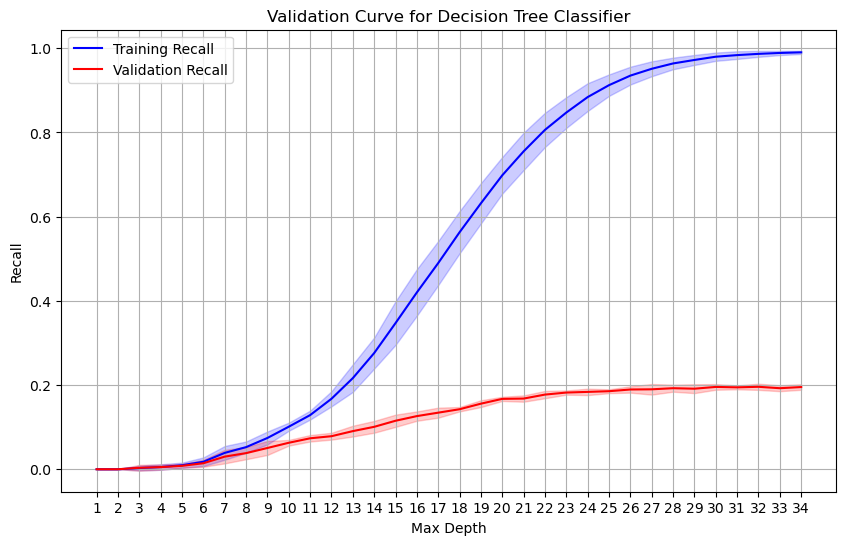

In [24]:
tree_classifier = DecisionTreeClassifier()

# Define the range of values for the hyperparameter to tune (e.g., max_depth)
param_range = np.arange(1, 35)

# Define recall as the scoring metric
scorer = make_scorer(recall_score)

# Compute validation curve
train_scores, valid_scores = validation_curve(
    tree_classifier, X_train, y_train, param_name='max_depth', param_range=param_range, cv=5, scoring=scorer
)

# Calculate mean and standard deviation of training and validation scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)

# Plot validation curve
plt.figure(figsize=(10, 6))
plt.plot(param_range, train_mean, label='Training Recall', color='blue')
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, alpha=0.2, color='blue')
plt.plot(param_range, valid_mean, label='Validation Recall', color='red')
plt.fill_between(param_range, valid_mean - valid_std, valid_mean + valid_std, alpha=0.2, color='red')
plt.title('Validation Curve for Decision Tree Classifier')
plt.xlabel('Max Depth')
plt.ylabel('Recall')
plt.legend()
plt.grid(True)
plt.xticks(param_range)
plt.show()

### DT learning curve

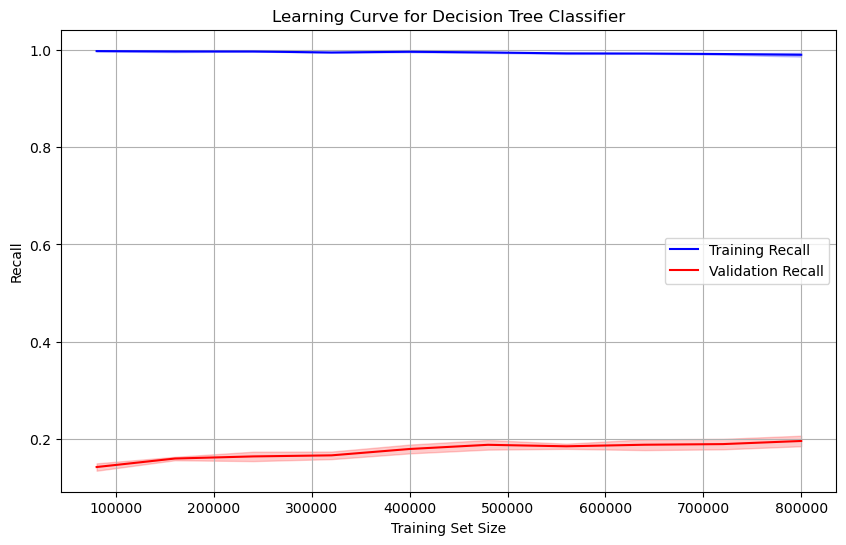

In [25]:
#max depth=28 is the best performance of DT model(concluded from validation curve)
tree_classifier = DecisionTreeClassifier(max_depth=34)
# Define train sizes
train_sizes = np.linspace(0.1, 1.0, 10)

recall_scorer = make_scorer(recall_score)

# Use the learning_curve function with the custom scoring function
train_sizes, train_scores, valid_scores = learning_curve(
    tree_classifier, X_train, y_train, train_sizes=train_sizes, cv=5, scoring=recall_scorer)


# Calculate mean and standard deviation of training and validation scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Recall', color='blue')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color='blue')
plt.plot(train_sizes, valid_mean, label='Validation Recall', color='red')
plt.fill_between(train_sizes, valid_mean - valid_std, valid_mean + valid_std, alpha=0.2, color='red')
plt.title('Learning Curve for Decision Tree Classifier')
plt.xlabel('Training Set Size')
plt.ylabel('Recall')
plt.legend()
plt.grid(True)
plt.show()

## Lasso Regression model

In [24]:
start_time = time.time()
lasso_regressor = Lasso()

# Train the model
lasso_regressor.fit(X_train, y_train)
end_time = time.time()
training_time = end_time - start_time
print("Training Time:", training_time, "seconds")
print()

start_time = time.time()
# Predict on the test set
y_pred_lasso = lasso_regressor.predict(X_test)
end_time = time.time()
prediction_time = end_time - start_time
print("Prediction Time:", prediction_time, "seconds")
print()

# Evaluate the model
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print("Lasso Regression Mean Squared Error:", mse_lasso)

Training Time: 0.10999774932861328 seconds

Prediction Time: 0.0025358200073242188 seconds

Lasso Regression Mean Squared Error: 0.007439645921887336


In [29]:
# Transform probabilities into binary predictions using a threshold (0.5)
preds_binary = (y_pred_lasso >= 0.5).astype(int)
conf_matrix_dt = confusion_matrix(y_test, preds_binary)
print("Confusion Matrix for Decision Tree:")
print()
print(conf_matrix_dt)
print()
accuracy_rf = accuracy_score(y_test, preds_binary)
#precision_rf = precision_score(y_test, preds_binary)
recall_rf = recall_score(y_test, preds_binary)
f1_rf = f1_score(y_test, preds_binary)
print(recall_rf)
print()
print("for this model recall is 0 and we kinda expect this cuz it's similar to the linear regression model")

Confusion Matrix for Decision Tree:

[[198477      0]
 [  1523      0]]

0.0

for this model recall is 0 and we kinda expect this cuz it's similar to the linear regression model


### Lasso tuning and evaluation

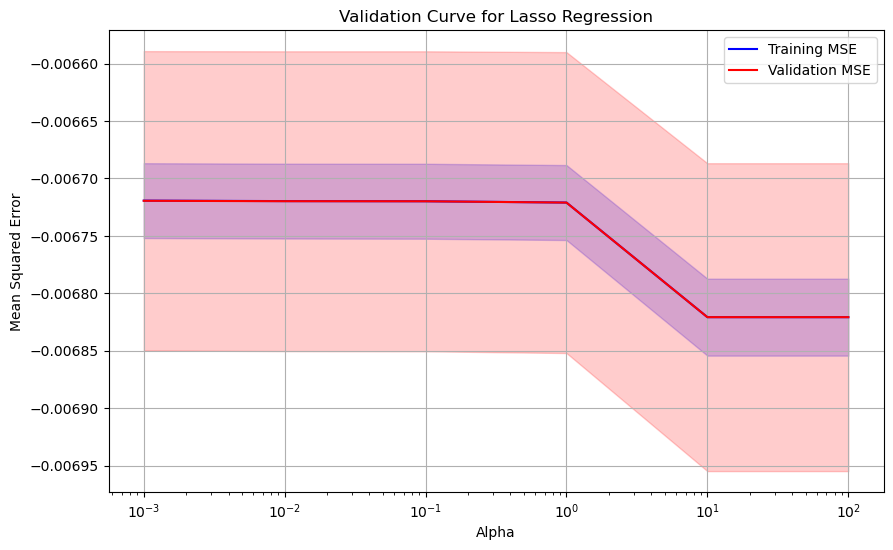

In [30]:
# Define the range of values for the hyperparameter to tune (e.g., alpha)
param_range = [0.001, 0.01, 0.1, 1.0, 10.0,100.0]


# Compute validation curve
train_scores, valid_scores = validation_curve(
    lasso_regressor, X_train, y_train, param_name='alpha', param_range=param_range, cv=5, scoring='neg_mean_squared_error'
)

# Calculate mean and standard deviation of training and validation scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)

# Plot validation curve
plt.figure(figsize=(10, 6))
plt.semilogx(param_range, train_mean, label='Training MSE', color='blue')
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, alpha=0.2, color='blue')
plt.semilogx(param_range, valid_mean, label='Validation MSE', color='red')
plt.fill_between(param_range, valid_mean - valid_std, valid_mean + valid_std, alpha=0.2, color='red')
plt.title('Validation Curve for Lasso Regression')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)
plt.show()

### Lasso learning curve

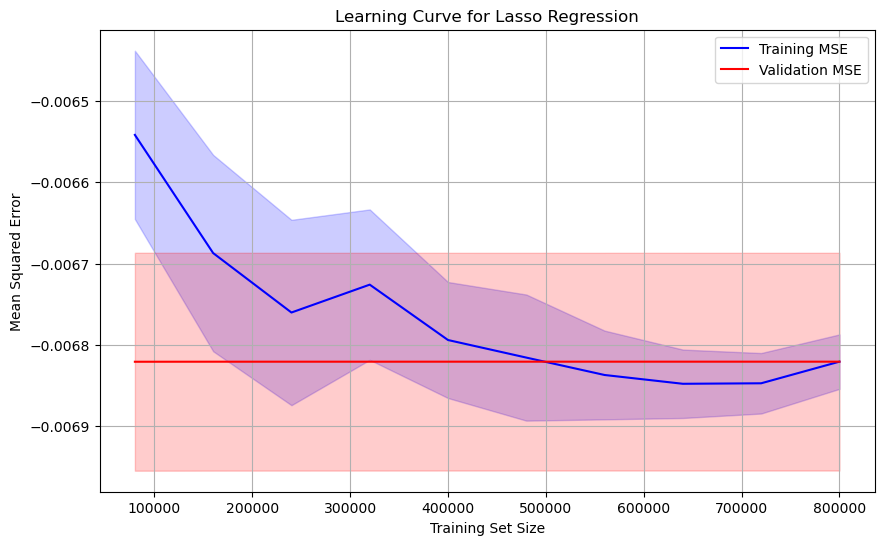

In [31]:
lasso_regressor = Lasso(alpha=10)

# Define train sizes
train_sizes = np.linspace(0.1, 1.0, 10)

# Use the learning_curve function with the custom scoring function
train_sizes, train_scores, valid_scores = learning_curve(
    lasso_regressor, X_train, y_train, train_sizes=train_sizes, cv=5, scoring= 'neg_mean_squared_error')


# Calculate mean and standard deviation of training and validation scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training MSE', color='blue')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color='blue')
plt.plot(train_sizes, valid_mean, label='Validation MSE', color='red')
plt.fill_between(train_sizes, valid_mean - valid_std, valid_mean + valid_std, alpha=0.2, color='red')
plt.title('Learning Curve for Lasso Regression')
plt.xlabel('Training Set Size')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)
plt.show()

## KNN Model

In [33]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [34]:
start_time = time.time()
knn_classifier = KNeighborsClassifier()

# Train the model
knn_classifier.fit(X_train, y_train)
end_time = time.time()
training_time = end_time - start_time
print("Training Time:", training_time, "seconds")
print()

start_time = time.time()
# Predict on the test set
y_pred_knn = knn_classifier.predict(X_test)
end_time = time.time()
prediction_time = end_time - start_time
print("Prediction Time:", prediction_time, "seconds")
print()

# Evaluate the model
recall_knn = recall_score(y_test, y_pred_knn)
print("KNN Recall Score:", recall_knn)

Training Time: 1.3856871128082275 seconds

Prediction Time: 30.967286109924316 seconds

KNN Recall Score: 0.004596191726854892


### Confussion matrix

In [35]:
conf_matrix_rf = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix for Random Forest:")
print(conf_matrix_rf)
accuracy_rf = accuracy_score(y_test, y_pred_knn)
precision_rf = precision_score(y_test, y_pred_knn)
recall_rf = recall_score(y_test, y_pred_knn)
f1_rf = f1_score(y_test, y_pred_knn)
print(recall_rf)
print()
print('recall is not zero but its not the best')

Confusion Matrix for Random Forest:
[[198436     41]
 [  1516      7]]
0.004596191726854892

recall is not zero but its not the best


### KNN evaluation and tuning

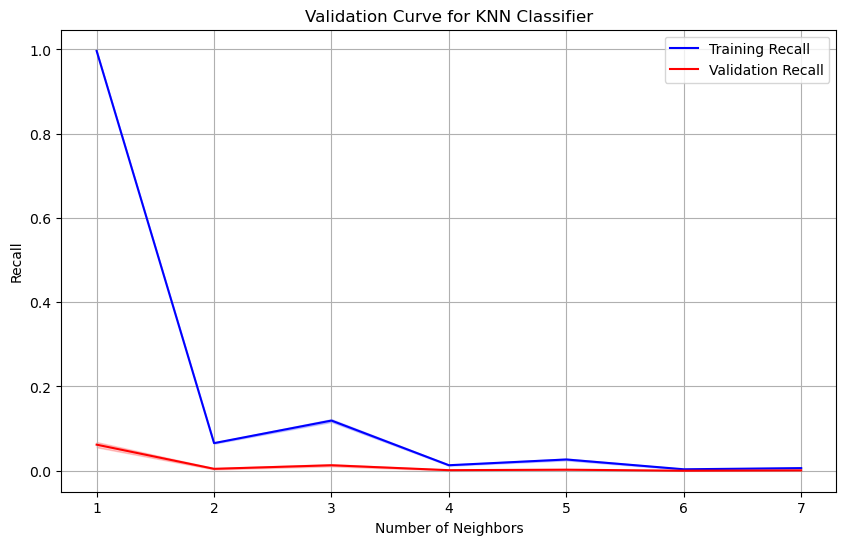

CPU times: user 1h 14min 58s, sys: 1.1 s, total: 1h 15min
Wall time: 1h 15min 12s


In [36]:
%%time

# Define the range of values for the hyperparameter to tune (e.g., n_neighbors)
param_range = np.arange(1, 8)

# Define recall as the scoring metric
scorer = make_scorer(recall_score)

# Compute validation curve
train_scores, valid_scores = validation_curve(
    knn_classifier, X_train, y_train, param_name='n_neighbors', param_range=param_range, cv=5, scoring=scorer
)

# Calculate mean and standard deviation of training and validation scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)

# Plot validation curve
plt.figure(figsize=(10, 6))
plt.plot(param_range, train_mean, label='Training Recall', color='blue')
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, alpha=0.2, color='blue')
plt.plot(param_range, valid_mean, label='Validation Recall', color='red')
plt.fill_between(param_range, valid_mean - valid_std, valid_mean + valid_std, alpha=0.2, color='red')
plt.title('Validation Curve for KNN Classifier')
plt.xlabel('Number of Neighbors')
plt.ylabel('Recall')
plt.legend()
plt.grid(True)
plt.xticks(param_range)
plt.show()

### KNN learning curve

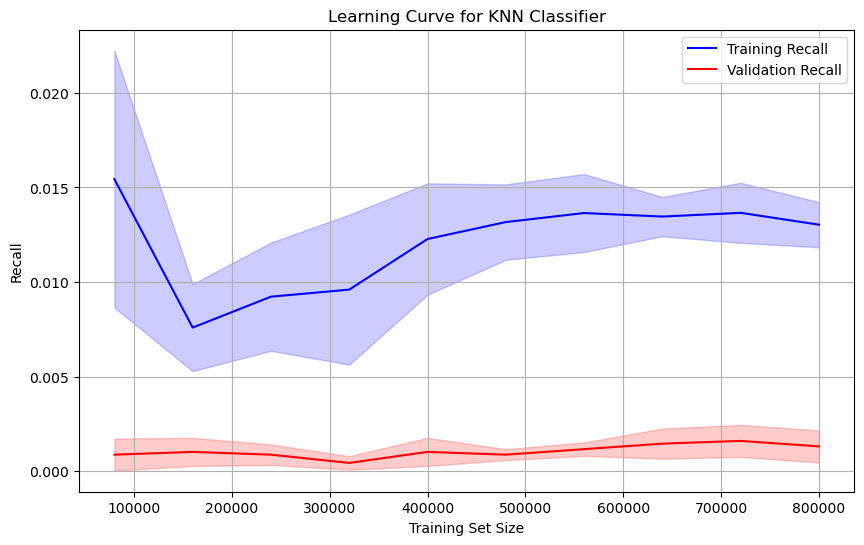

CPU times: user 55min 51s, sys: 1.22 s, total: 55min 52s
Wall time: 56min 5s


In [39]:
%%time
knn_classifier = KNeighborsClassifier(n_neighbors=4)

# Define train sizes
train_sizes = np.linspace(0.1, 1.0, 10)


recall_scorer = make_scorer(recall_score)

# Use the learning_curve function with the custom scoring function
train_sizes, train_scores, valid_scores = learning_curve(
    knn_classifier, X_train, y_train, train_sizes=train_sizes, cv=5, scoring=recall_scorer)



# Calculate mean and standard deviation of training and validation scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Recall', color='blue')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color='blue')
plt.plot(train_sizes, valid_mean, label='Validation Recall', color='red')
plt.fill_between(train_sizes, valid_mean - valid_std, valid_mean + valid_std, alpha=0.2, color='red')
plt.title('Learning Curve for KNN Classifier')
plt.xlabel('Training Set Size')
plt.ylabel('Recall')
plt.legend()
plt.grid(True)
plt.show()

### KNN hyperparameters fine tune

In [ ]:
%%time
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']  # Algorithm used to compute the nearest neighbors
}

# Instantiate KNeighborsClassifier with n_neighbors=4; 4 is our best performance and included from validation curve
knn_classifier = KNeighborsClassifier(n_neighbors=4)

# Instantiate GridSearchCV with recall as the scoring metric
grid_search = GridSearchCV(estimator=knn_classifier, param_grid=param_grid,
                           cv=5, scoring=scorer)

# Perform grid search to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the model with the best hyperparameters on the entire training set
best_knn_classifier = KNeighborsClassifier(n_neighbors=4, **best_params)
best_knn_classifier.fit(X_train, y_train)

# Evaluate the model on the test set
test_recall = recall_score(y_test, best_knn_classifier.predict(X_test))
print("Test Recall:", test_recall)